In [225]:
#importacion de las librerias usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [226]:
#Definimos el dataframe con datos de entrenamiento y de prueba
df = pd.read_csv("train.csv")


# Limpieza de datos

In [227]:
#veamos los recuentos de valores unicos de cada columna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [228]:
df.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [229]:
#Eliminamos columnas innecesarias
df = df.drop(["PassengerId","Name","SibSp", "Ticket"], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,0,7.2500,NaN,S
1,1,1,female,38.0,0,71.2833,C85,C
2,1,3,female,26.0,0,7.9250,NaN,S
3,1,1,female,35.0,0,53.1000,C123,S
4,0,3,male,35.0,0,8.0500,NaN,S


In [230]:
#Vemos cuandos valores null tenemos
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [231]:
#Creí que la columna Cabin sería útil pero con tanta cantidad de valores nulos ya no nos sirve
df = df.drop(["Cabin"], axis=1)

In [232]:
#Convertimos los datos faltantes de edad en el promedio, no es lo ideal pero me parece necesaria la columna
df.Age = df.Age.fillna(df.Age.mean())

In [233]:
#Convertiremos los datos a números para que sea más fácil de manipular más adelante
df['Embarked'] = df['Embarked'].map(dict(C=1, Q=2, S=3))

In [234]:
#Eliminamos los datos nulos de la columna Embarked
max_count=df.Embarked.value_counts().max()
df.Embarked=df.Embarked.fillna(max_count)

In [235]:
#Debemos convertir los géneros en booleanos para mayor facilidad
df['Sex'] = df['Sex'].map(dict(male=1, female=0))
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,0,7.2500,3.0
1,1,1,0,38.0,0,71.2833,1.0
2,1,3,0,26.0,0,7.9250,3.0
3,1,1,0,35.0,0,53.1000,3.0
4,0,3,1,35.0,0,8.0500,3.0


In [236]:
#Verificamos que se realicen los cambios
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

Ya tenemos los datos limpios


#Visualicemos los datos

In [237]:
#Veamos cuantos pasajeros sobrevivieron de los 891 del dataset de prueba
df.Survived.value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Vemos que solo el 38% sobrevive de 891.

In [238]:
#Ahora veamos cuantos pasajeros hay por clase
porcentajes_clases = df.Pclass.value_counts(normalize=True)*100
porcentajes_clases


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


vemos que más de la mitad de los pasajeros eran de 3ra clase

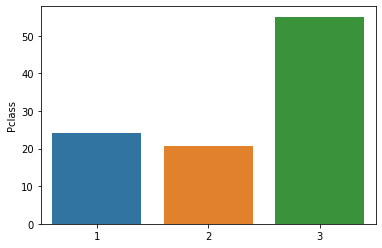

In [239]:
sns.barplot(x = df['Pclass'].unique(), y = porcentajes_clases)


In [240]:
#Ahora vemos el porcentaje de supervivencia agrupado por cada clase
df["Survived"].groupby(df.Pclass).value_counts(normalize=True)*100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

En este caso vemos que la 1ra clase tiene la tasa más alta de supervivencia con un 62%

Mientras que la 3ra clase tiene la tasa más alta de mortalidad con un 75%

In [241]:
#Ahora distingamos el porcentaje de pasajeros segun su genero
df.Sex.value_counts(normalize=True)*100

1    64.758698
0    35.241302
Name: Sex, dtype: float64

Veamos que un 64% de los pasajeros eran hombres 

Mientras que un 35% eran mujeres

In [242]:
#Ahora vemos el porcentaje de supervivencia agrupado por cada genero
df["Survived"].groupby(df.Sex).value_counts(normalize=True)*100

Sex  Survived
0    1           74.203822
     0           25.796178
1    0           81.109185
     1           18.890815
Name: Survived, dtype: float64

En este caso vemos que un 74% del total de las mujeres sobrevivieron

Mientras que solo un 18% de los hombres lo hicieron

#Comencemos con el algoritmo

## Random Forest

In [243]:
#Importamos las librería a usar
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [244]:
#Separamos el dataset
X = df.drop({'Survived'}, axis=1)
y = df['Survived']

In [245]:
#Separamos en train y test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify = y, test_size = 0.30, random_state=11 )

In [246]:
#Creamos el modelo
rfc = RandomForestClassifier(n_estimators = 100)

In [247]:
#Lo entrenamos
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [248]:
y_pred = rfc.predict(X_test)

In [249]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8246268656716418


In [250]:
#Importamos la matriz de confusion para revisar las estadísticas
from sklearn.metrics import confusion_matrix, classification_report

In [251]:
#Usamos la matríz de confusion para revisar las estadísticas
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141  24]
 [ 23  80]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       165
           1       0.77      0.78      0.77       103

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



# Dataset de test

## Limpiamos los datos

In [302]:
#Leemos el nuevo dataset
df_pred = pd.read_csv('test.csv')
df_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [303]:
#Guardamos una copia del dataset para no perder las Id's
df_orig = df_pred.copy(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'])

#Eliminamos columnas que no necesitamos para las predicciones
df_pred = df_pred.drop(['PassengerId', "Name","SibSp", "Ticket"], axis=1)
df_pred.head()

,Pclass,Sex,Age,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,7.8292,NaN,Q
1,3,female,47.0,0,7.0000,NaN,S
2,2,male,62.0,0,9.6875,NaN,Q
3,3,male,27.0,0,8.6625,NaN,S
4,3,female,22.0,1,12.2875,NaN,S


In [304]:
#Revisamos los datos
df_pred.isnull().sum()

Pclass        0
Sex           0
Age          86
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [305]:
#Eliminamos la columna "Cabin", que olvidé hacerlo arriba 
df_pred = df_pred.drop(["Cabin"], axis=1)

#Rellenamos los datos faltantes de la edad con un promedio
df_pred.Age = df_pred.Age.fillna(df_pred.Age.mean())

#Convertimos los datos de "Embarked" a numérico para poder usarlos
df_pred['Embarked'] = df_pred['Embarked'].map(dict(C=1, Q=2, S=3))
max_count=df_pred.Embarked.value_counts().max()
df_pred.Embarked=df_pred.Embarked.fillna(max_count)

#Covnertimos los datos de "Sex" en numérico también para poder usarlos
df_pred['Sex'] = df_pred['Sex'].map(dict(male=1, female=0))
df_pred.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,1,34.5,0,7.8292,2
1,3,0,47.0,0,7.0000,3
2,2,1,62.0,0,9.6875,2
3,3,1,27.0,0,8.6625,3
4,3,0,22.0,1,12.2875,3


In [306]:
#La columna "Fare" todavía tenia un dato NaN así que lo dejamos como 0
df_pred = df_pred.fillna(0)

#Revisamos que estén los datos limpios
df_pred.isnull().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Predecimos el nuevo Dataset

In [307]:
y_pred2= rfc.predict(df_pred)

In [308]:
#Unimos el dataset que guardamos junto a las predicciones
df_orig['Survived'] = y_pred2

In [311]:
#Eliminamos las columnas de más para que la entrega se ajuste a los requerimientos de kaggle
df_orig = df_orig.drop(['Pclass', 'Name', 'Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
df_orig.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [313]:
df_orig.to_csv('Survived_Titanic.csv')